<a href="https://colab.research.google.com/github/Umesh2851997/Yes-bank-stock-closing-price-prediction/blob/main/Yes_Bank_Closing_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary -**
#Capston Project -3

##SUPERVISED - REGRESSION

###Project - Yes bank stock closing price prediction



Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion. We have used yes bank stock price data set. This dataset contains 5 different features that can be used for predicting close price prediction using machine learning. We have built machine learning regression model for price prediction. We have used some of best models.


# **GitHub Link -**
https://github.com/Umesh2851997/Yes-bank-stock-closing-price-prediction

# **Problem Statement**


Yes Bank, a prominent institution in the Indian financial sector, gained attention in the media since 2018 due to the fraud case linked to Rana Kapoor. Given this context, it becomes intriguing to analyze the influence of this incident on the bank's stock prices and evaluate the efficacy of time series models or other predictive models in capturing such complex situations. The dataset at hand encompasses monthly stock prices of Yes Bank since its establishment, featuring details like monthly closing, opening, highest, and lowest stock prices.



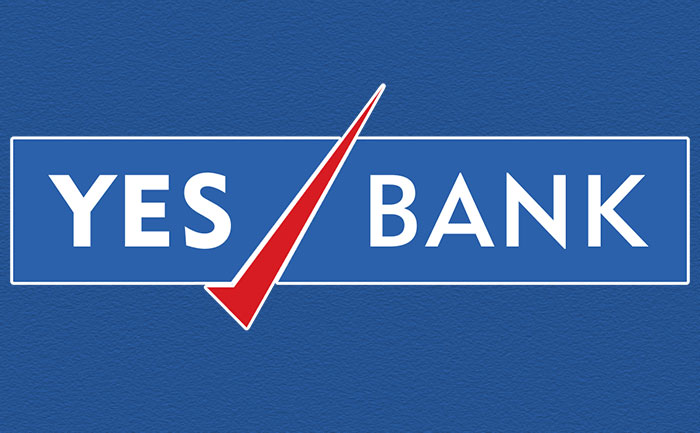

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [377]:
import warnings
warnings.filterwarnings('ignore')

# Import Wrangling Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Data preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler #scale the data

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
#grid search to optimize parameters,
#model training, evaluation, and hyperparameter tuning.

# Regression models
from sklearn.linear_model import LinearRegression # regression model
from sklearn.neighbors import KNeighborsRegressor #Knn model
from sklearn.ensemble import RandomForestRegressor #random forest
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV # data regularization

# import required metrics for model performance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error




### Dataset Loading

In [379]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [380]:
# Dataset First Look
df = pd.read_csv("/content/drive/MyDrive/My_new_numpy/data_YesBank_StockPrices.csv")
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [381]:
#last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [382]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [383]:
# Dataset Info
df.describe().T
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


#### Duplicate Values

In [384]:
# Dataset Duplicate Value Count
df.duplicated()
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


#### Missing Values/Null Values

In [385]:
# Missing Values/Null Values Count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [386]:
# Visualizing the missing values
df.isna().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [387]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [335]:
df

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


In [388]:
col = list(df.columns)
col

['Date', 'Open', 'High', 'Low', 'Close']

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#Univariate Analysis

#### Chart - 1

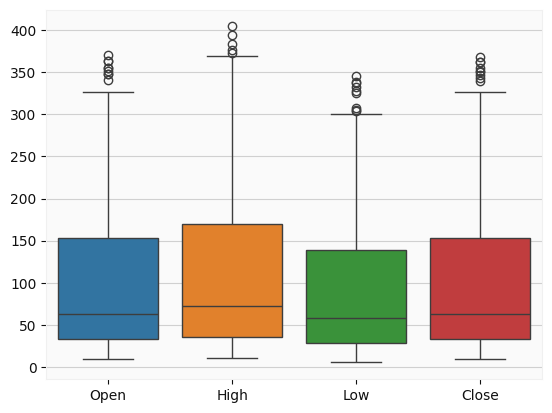

In [396]:
ax = sns.boxplot(df[col])

plt.show()

#### Chart - 2

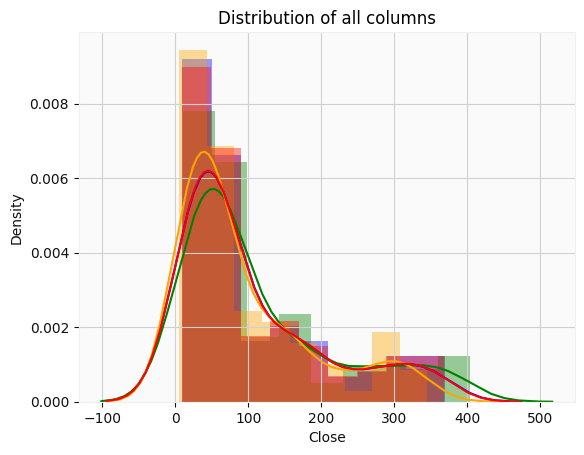

In [397]:
sns.distplot(df['Open'], kde=True, label='Open', color='blue')
sns.distplot(df['High'], kde=True, label='High', color='green')
sns.distplot(df['Low'], kde=True, label='Low', color='orange')
sns.distplot(df['Close'], kde=True, label='Close', color='red')
plt.title("Distribution of all columns")
plt.show()

#Bivariate Analysis

#### Chart - 3

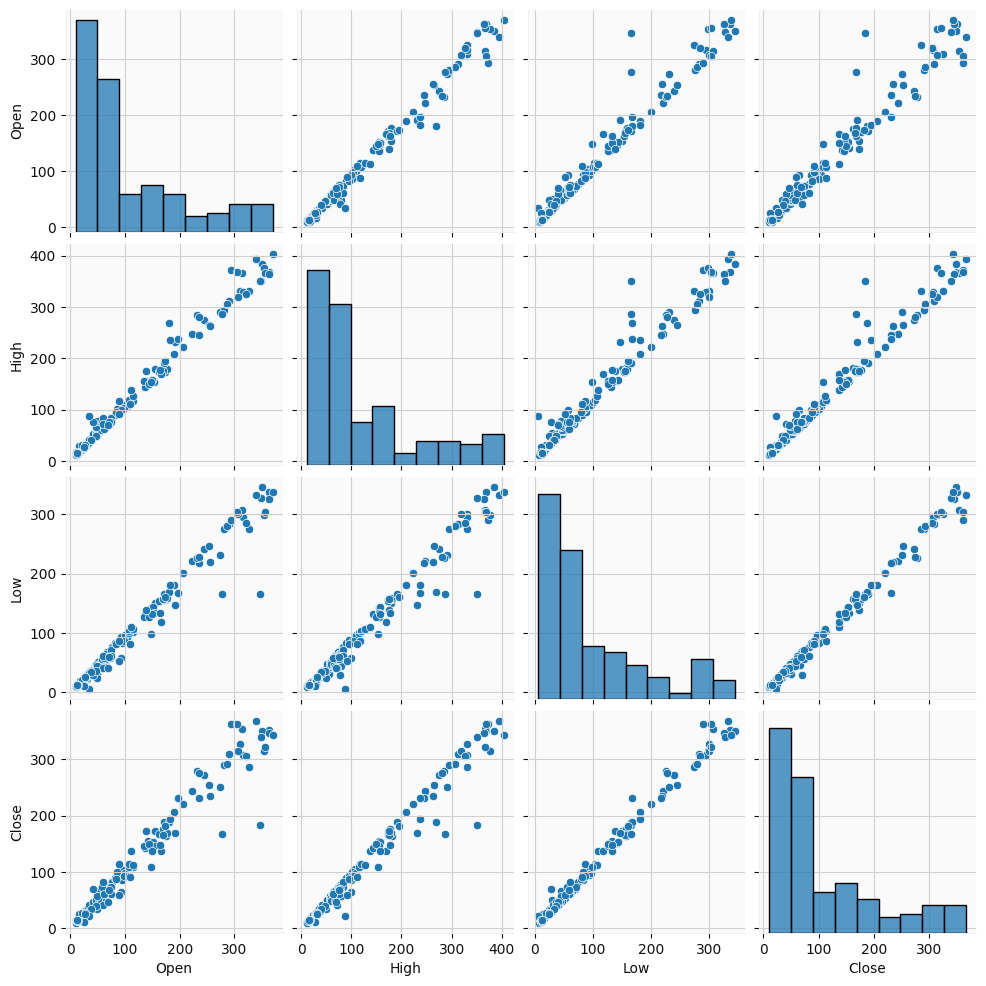

In [398]:
sns.pairplot(df[[ 'Open', 'High', 'Low', 'Close']])
plt.show()

#### Chart - 4

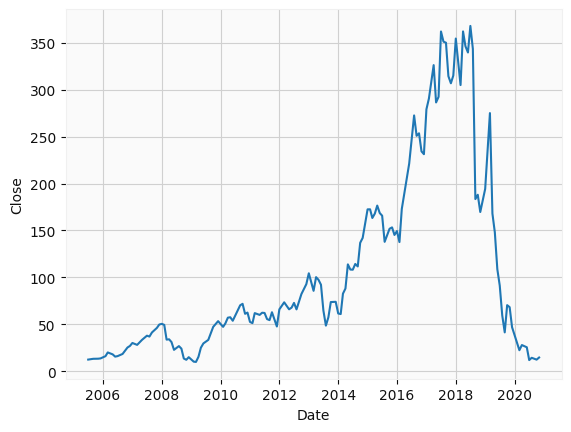

In [399]:
#line chart
sns.lineplot(x='Date',y='Close',data=df)
plt.show()

#### Chart - 5

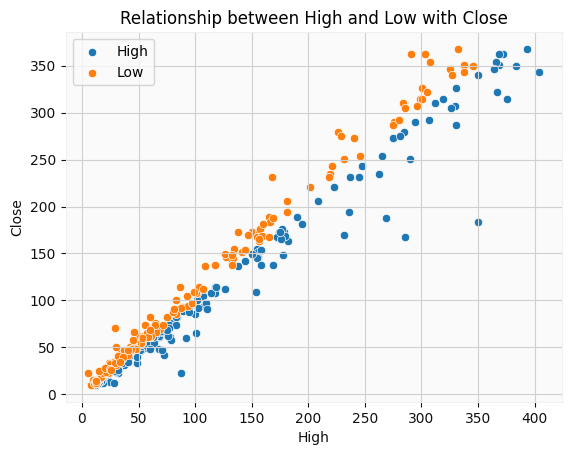

In [342]:
# Assuming df is your DataFrame
sns.scatterplot(x='High', y='Close', data=df, label='High')
sns.scatterplot(x='Low', y='Close', data=df, label='Low')

plt.title('Relationship between High and Low with Close')
plt.legend()
plt.show()

#### Chart - 6

In [400]:
#set the index of Date
df.set_index('Date',inplace=True)

In [401]:
# Upgrade matplotlib
!pip install mplfinance

# Import mplfinance
import mplfinance as mpf


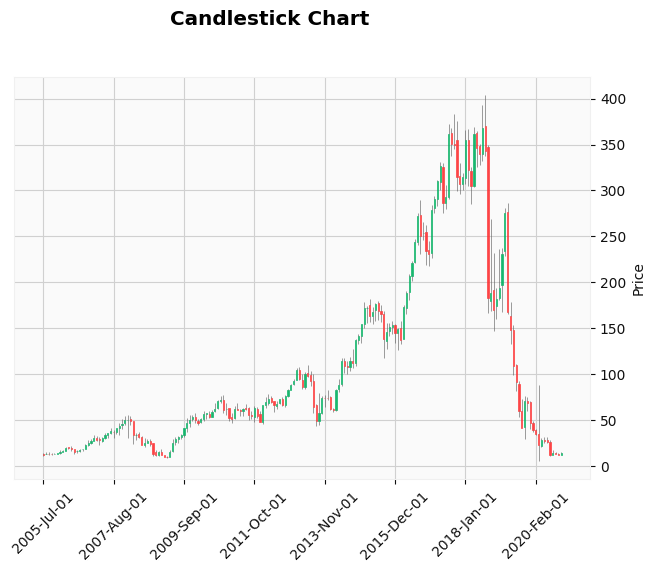

In [402]:
mpl1 = df[['Open', 'High', 'Low', 'Close']]
mpf.plot(mpl1, type='candle', style='yahoo', title='Candlestick Chart')

Candlestick Chart will present you regarding the trends over the given periods from 2005 to 2020. It will show you based on the volume or based on the price.

#Multivariate Analysis

#### Chart - 7

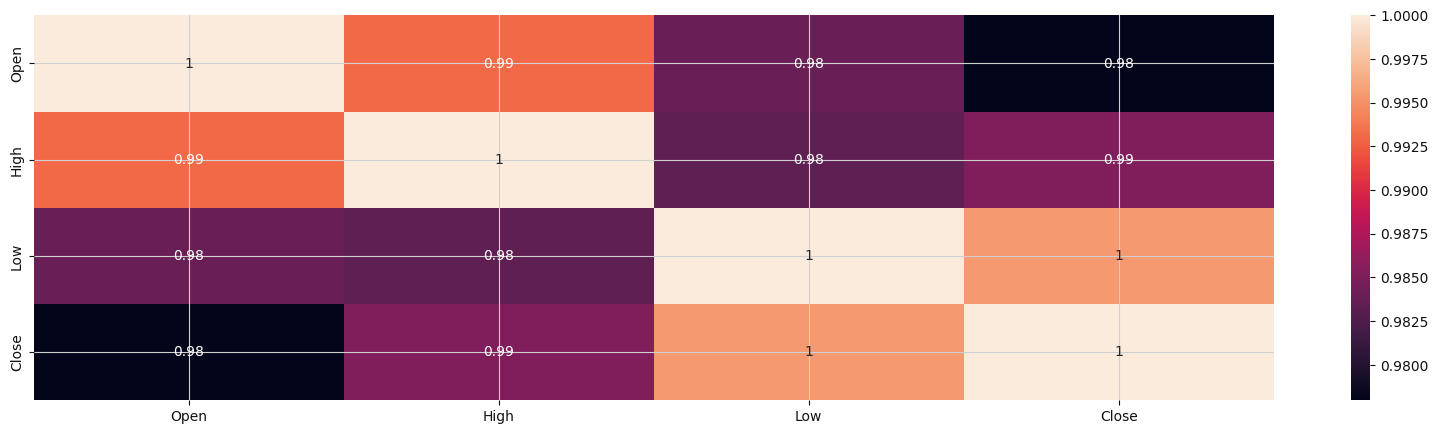

In [403]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(df.corr(),annot=True)
plt.show()

All features in the dataset exhibit strong correlations with each other, suggesting high multicollinearity. In the context of linear regression, which assumes minimal multicollinearity, selecting a single feature or deriving an average from these correlated features becomes a viable approach. This simplification aids the model in avoiding redundancy while maintaining predictive accuracy. To address multicollinearity more explicitly, variable transformations can be applied. These transformations may involve scaling, normalization, or other techniques to mitigate the impact of highly correlated features. By employing these strategies, we aim to enhance the robustness of the regression model and improve its overall performance.






#Data Preprocessing

 The PowerTransformer is designed to transform the entire distribution of a feature to make it more closely resemble a normal distribution. This transformation can be particularly useful when the data is skewed or exhibits non-normality.

Outliers, on the other hand, are data points that are significantly different from the majority of the data. While power transformations might have an impact on extreme values, their main goal is to address issues related to the overall shape of the distribution, such as skewness.

In [404]:
#PowerTransformer
pw = PowerTransformer(method='box-cox',standardize=True)

In [405]:
#Columns in the Dataset
cf= df[list(df.columns)]

In [406]:
df['Close']

Date
2005-07-01    12.46
2005-08-01    13.42
2005-09-01    13.30
2005-10-01    12.99
2005-11-01    13.41
              ...  
2020-07-01    11.95
2020-08-01    14.37
2020-09-01    13.15
2020-10-01    12.42
2020-11-01    14.67
Name: Close, Length: 185, dtype: float64

In [350]:
kf = pd.DataFrame(pw.fit_transform(cf))

In [407]:
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [408]:
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

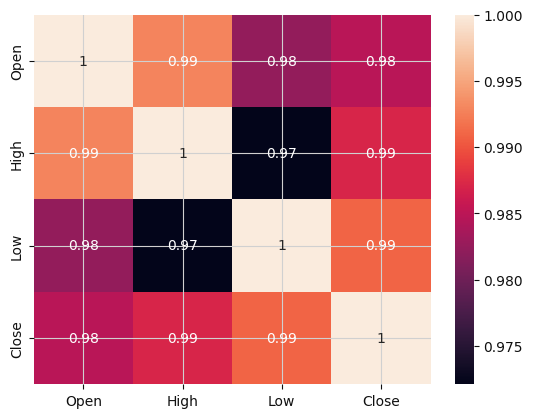

In [409]:
sns.heatmap(kf.corr(),annot=True)

In [410]:
col = list(kf.columns)

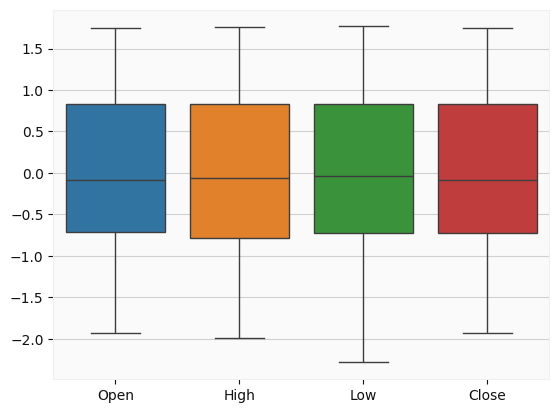

In [412]:
ax = sns.boxplot(kf[col])

plt.show()

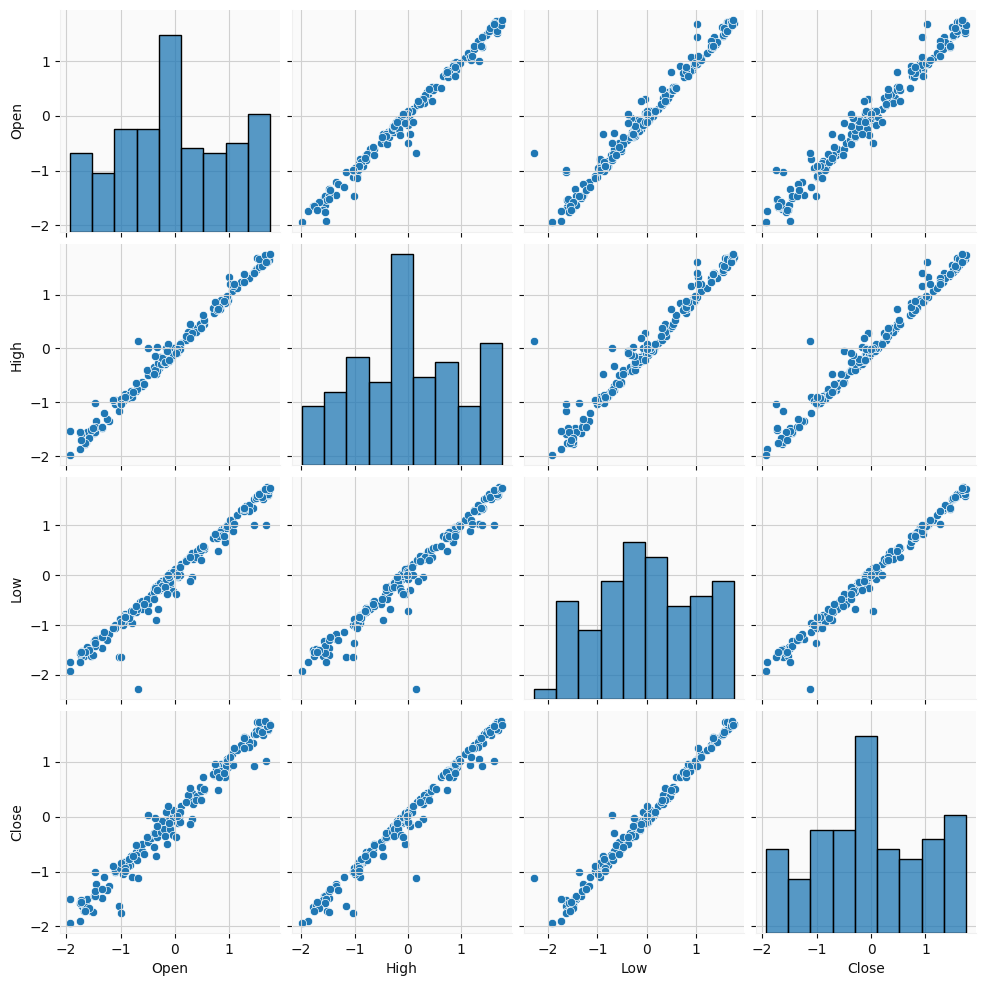

In [413]:
#Pair Plot
sns.pairplot(kf)

In [357]:
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


**Dependent Variable & Independent Variable**

In [414]:
dependent_variable = 'Close'
independent_variable = list(set(kf.columns.tolist())-{dependent_variable})

In [431]:
x=df[independent_variable].values

In [416]:
y=df[dependent_variable].values

Linear Regrression

In [418]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [420]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [421]:
y_pred = reg.predict(x_test)

In [422]:
linear_r2 = r2_score(y_pred,y_test)

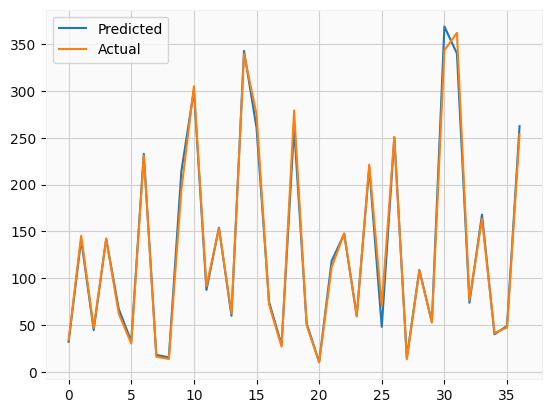

In [423]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

In [426]:
reg.score(x_train, y_train)

0.9954546486753905

In [428]:
#out of sample score (R^2)

reg.score(x_test, y_test)


0.9930815866308079

0.9930815866308079

#KNN

In [432]:
#import metrics
from sklearn import metrics

In [438]:
knn = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)


In [439]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [440]:
model.best_params_

{'n_neighbors': 2}

In [441]:
knn = KNeighborsRegressor(n_neighbors=2)

In [442]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [443]:
knn_pred = knn.predict(x_test)

In [444]:
r2_knn = r2_score(y_test,knn_pred)

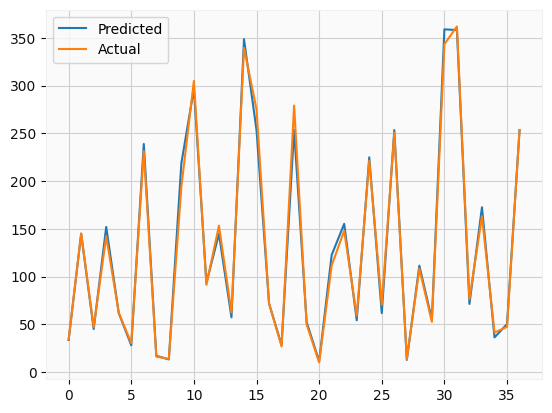

In [445]:
plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***